<a href="https://colab.research.google.com/github/TranThaiAn19146304/cnn_camxuc/blob/main/cnn_camxuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [3]:
#thêm hàm con để vẽ đồ thị
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

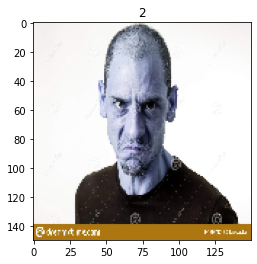

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)



index = np.random.randint(0,86)

plt.subplot(1,1,1)
plt.title(str(y_train[index]))
plt.imshow(x_train[index],cmap=plt.get_cmap('gray'))
plt.show()



In [7]:
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 4)
x_train, y_train = shuffle(x_train,y_train)

In [38]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [39]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 201ms/step - loss: 9.7407 - acc: 0.1940 - val_loss: 98.2216 - val_acc: 0.1765
Epoch 2/50
2/2 [==============================] - 0s 56ms/step - loss: 105.6838 - acc: 0.2836 - val_loss: 10.8049 - val_acc: 0.4118
Epoch 3/50
2/2 [==============================] - 0s 52ms/step - loss: 13.0309 - acc: 0.2388 - val_loss: 10.9785 - val_acc: 0.1765
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 9.4408 - acc: 0.2687 - val_loss: 2.8576 - val_acc: 0.1765
Epoch 5/50
2/2 [==============================] - 0s 60ms/step - loss: 2.2638 - acc: 0.2687 - val_loss: 1.6206 - val_acc: 0.2353
Epoch 6/50
2/2 [==============================] - 0s 53ms/step - loss: 1.5421 - acc: 0.2537 - val_loss: 1.3872 - val_acc: 0.4118
Epoch 7/50
2/2 [==============================] - 0s 51ms/step - loss: 1.4933 - acc: 0.2836 - val_loss: 1.4262 - val_acc: 0.1765
Epoch 8/50
2/2 [==============================] - 0s 52ms/step - loss: 1.3769 - acc: 0.3582 - val_los

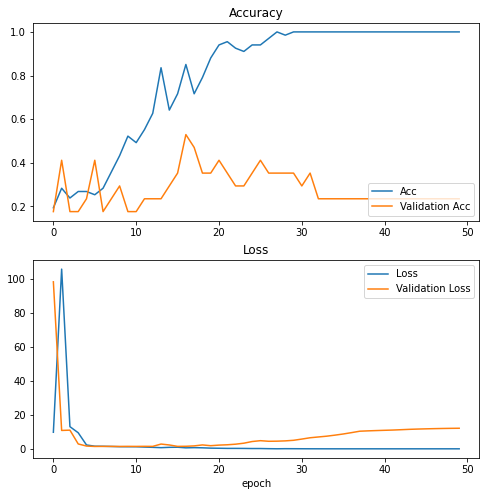

In [40]:
plot_history(his)

In [33]:
#gan the
label = ["hanhphuc","buon","gian_du","ngac_nhien"]

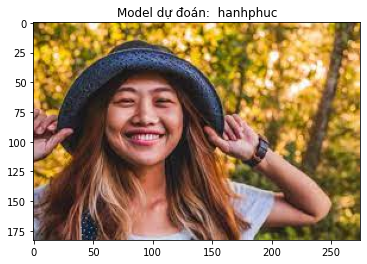

In [41]:
#lấy ảnh
img = cv2.resize(cv2.imread('vui.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)

#nhận diện
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('vui.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [42]:
model.predict(img)

array([[1.0000000e+00, 3.4208424e-34, 4.0289944e-22, 4.6023429e-30]],
      dtype=float32)

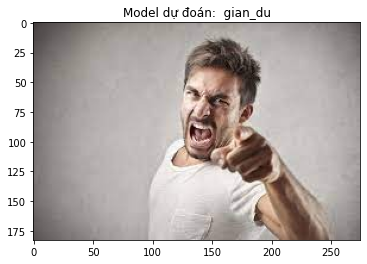

In [46]:
#lấy ảnh
img = cv2.resize(cv2.imread('gian_du.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)

#nhận diện
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('gian_du.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [47]:
model.predict(img)

array([[7.9447426e-10, 9.8630609e-13, 1.0000000e+00, 4.1475863e-09]],
      dtype=float32)

In [ ]:
model.save